In [1]:
%load_ext autoreload

In [58]:
%autoreload 2
import pandas as pd
import numpy as np
import time
import UserDefinedFunctions
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels
import itertools

%matplotlib inline

## 4. Variable Selection

In this notebook we'll be looking at different ways of pruning our model to make it as predictive as possible but also as simple as possible. 

Arguably, the biggest problem in developing a trading strategy is to find one that works in real-life and not just in a backtest. We talked previously about how all sorts of factors conspire to make our backtested strategy seem more impressive than it turns out to be on real data. Data leakage in terms of using future data is one danger. Can you think of another? 

How about choosing which variables to test in the first place? For instance we know that in 2008 the housing market crashed and that the health of the housing market was a predictor of the stock market. Therefore we include several variables about the housing market (delinquenices and housing starts) amongst our set of variables to test. But including those housing market variables in the first place relies on us knowing that the housing market would crash and take the stock market along with it. 

Now that I've hopefully implanted some doubt in your mind, let's move on. In the next section from Hull et al. they will address the problem of variable selection. They've defined a set of 15 variables to potentially use in the model. Now they'll decide which variables to actually include.

<div class="alert alert-info" role="alert">
<span class="label label-primary"> The Paper </span>
<br><br>

<a id='snap_back_1'></a>
We consider 15 forecasting variables, which means each time we fit the model we need to estimate 15 forecasting coefficients plus the intercept term for a total of 16 parameters.  We limit the number of estimated parameters through variable selection, which leads to more parsimonious models and generally results in better out-of-sample forecasting properties.  <a href='#supplemental_content_1'>Parsimonious</a> models are also easier to interpret and attribute performance.  It is easier to understand which variables contribute to forecasting results when there are fewer variables to consider.  
<br><br>

<a id='snap_back_2'></a>
<a id='snap_back_3'></a>
We estimate the WLS specification which incorporates a <a href='#supplemental_content_2'>bidirectional stepwise procedure</a>.  Variables are chosen based on the <a href='#supplemental_content_3'>Akaike Information Criterion (AIC)</a>.  The bidirectional stepwise selection combines forward selection, which starts with no variables in the model and adds variables that capture the largest improvement, and backward elimination, which starts with all candidate variables and removing the least significant variables.  One feature of the stepwise WLS estimation is that the number of selected variables will change, as predictors come in and out of the selected set.  In comparison, in WLS without variable selection, all of the variables always get non-zero weights, even if they only contribute marginally in a given sample.  Hull and Qiao (2017) use correlation screening as their variable selection technique because using overlapping six-month market returns leads to inflated t-statistics and results in misleading traditional likelihood function calculations and AIC values.   
<br><br>

We estimate the stepwise WLS at the end of each month.  Starting on 03/31/2003, we use 154 months from 06/01/1990 to 03/31/2003 to estimate our model.  We obtain the model parameters on 03/31/2003, which we hold constant from 04/01/2003 to 04/30/2003.  For every day in this month, we use the updated return predictors, along with the fixed model parameters, to produce one-month equity risk premium forecasts on a daily frequency.  On 04/30/2003, we re-estimate our model using an expanding window, from 06/01/1990 to 04/30/2003, to obtain new parameter values which we use for next month’s equity premium forecasts.  We continue to re-estimate our model monthly and make one-month equity premium forecasts every day until the end of the sample.  We publish a summary of our model output in our Daily Report.  A sample of the Daily Report appears in Appendix I. 
<br><br>


2.3 Variable Selection 


<a id='snap_back_4'></a>
In Figure 1 we look at the identity of the selected variables.  On the vertical axis is the contribution of each explanatory variable towards the <a href='#supplemental_content_4'>total explained variance</a> (Lindman, Merenda, and Gold, 1980; Chevan and Sutherland, 1991).  The stepwise WLS puts zero weight on marginal variables that do not add substantially to the model.  Of the 15 variables we consider, typically only about five to seven are selected at any given time.  There are significant changes in the number and identify of the selected variables.  In contrast, without variable selection, WLS reduces the weight put on marginal variables that do not contribute to the explanatory power of the model, but does not remove them from the model.   
<br><br>

Consider variable X which does not add any forecasting power to the model.  If we use WLS with variable selection, the marginal contribution of X would be too small and it will be eliminated from our model.  If we use WLS, we always put a positive weight on X.  For out-of-sample prediction, including X only adds noise to our forecast.  The forecasts coming from WLS with variable selection will likely be more stable compared to WLS without variable selection. 
<br><br>


<div class="alert alert-info" role="alert">
![](variable_selection_1.png "Title")

<div class="alert alert-info" role="alert">


Some variables were selected to be in the model throughout the sample, whereas others only contributed to the explanatory power of the model in a fraction of the sample.  CP was selected in the earlier part of the sample until 2009, and then it was eliminated from the model.  BD was important until 2013, and then it was driven out by other variables.  On the one hand, CRP and DL were useful in the first half of the sample but not in the second half.  On the other hand, NAPM and LOAN were only selected in the second half but not in the first half.  In addition, some variables such as EVUSD were almost never selected, but we did not remove them from the pool of candidate variables. 
<br><br>

Predictor variables entering and exiting our model may be due to variables containing overlapping information.  When one variable is dropped from the model, another variable (or several variables) that may share part of the same information set could come into the model.  For example, in 2004 BD (Baltic Dry Index) was temporarily removed from the model and UR (Change in Unemployment Rate) was added.  It is likely that both variables contained useful information about the macroeconomic environment, so when BD was dropped from the model, another variable that contained similar information was added. 
<br><br>

<span class="label label-warning"> Assessment: Remember </span>

What of the following are True?

 * The AIC metric should only be used with OLS, not WLS
 * More complex models are always better because they fit the data better
 * Linear models are by definition parsimonious
 * The variable with the highest R^2 in a univariate regression (when you regress the target variable on a single explanatory variable only) will indicate the variable that is the most important when you combine all variables in a multivariate regression (when you regress the target variable on all explanatory variables)
 * R^2 is the best metric to use in stepwise variable selection
 * AIC is the best metric to use in stepwise variable selection

<span class="label label-warning"> Assessment: Understand </span>
    
In variable selection we are picking which variables to use out of a set of all possible variables. This is akin to selecting which model to use out of a set of possible models. 

Hull et al. use 15 explanatory variables in their variable selection process. How many possible models (explanatory variable combinations) are they choosing from? What is the complexity of the "model space" as the number of explanatory variables grow? 

[your answer here]









Answer: Each variable can either be included in the model or excluded from the model. So that's 2 options for var1, 2 options for var2, etc. 

This will amount to 2x2x2x2x.... or 2^N where there are N possible variables. 

Given that Hull et al. use 15 variables, that's 2^15 = 32,768 different models. 

The model complexity is O(2^N). 

<span class="label label-warning"> Assessment: Understand </span>
    
In the forward variable selection procedure described, we test adding each variable and then actually add the variable with the best performance gain. We then continue doing this until some stoppin criteria. 

Hull et al. use 15 explanatory variables in their variable selection process. What is the worst-case scenario for the number of tests we must implement? 

[your answer here]







Answer: In the first iteration you have to test 15 variables. In the next stage you have to test 14 variables to potentially add in addition to the 1 previously chosen. In the next stage you have to test 13 variables to potentially add to the 2 previously chosen, etc. 

So you end up running 15 + 14 + 13 +... + 1 = 120 tests. 

<span class="label label-warning"> Assessment: Understand </span>
    
    
Let's develop some sense of the relationship between model performance and the number of variables we use. Plot R^2 vs the number of explanatory variables. Is performance increasing, decreasing or constant in the number of explanatory variables? You can add variables in any ordering as it doesn't particularly matter for this exercise. 

Do the same using AIC as your performance measure.



In [ ]:
# TODO








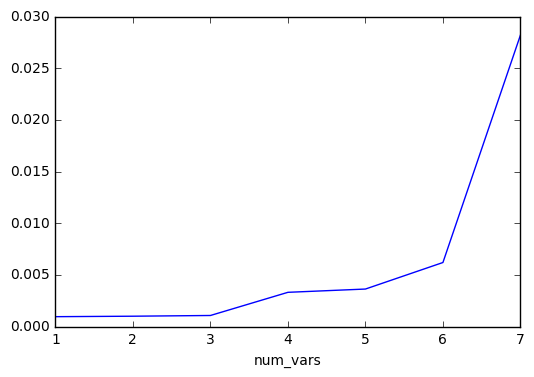

In [5]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################

# get the input data
training_data = pd.read_hdf('training_data.hdf')

all_possible_vars = ['industrial_production', 'change_inflation', 'credit_risk_premium', 'slope_interest_rate',
         'housing_starts', 'delinquencies', 'change_unemployment']

vars_to_use = []

# save the performance of each model
num_vars = []
r_squared_values = []
aic_values = []

# add each variable to the explanatory variable set, one at a time
for var in all_possible_vars:
    
    # add the variable to the variables you are using
    vars_to_use.append(var)

    results = UserDefinedFunctions.WLS_regression(training_data, x_vars = vars_to_use,  rho = 0.99)
    current_aic = results['aic']
    current_r_squared = results['r_squared']
    
    r_squared_values.append(current_r_squared)
    aic_values.append(current_aic)
    num_vars.append(len(vars_to_use))
    
# make a dataframe with the results
df = pd.DataFrame({'num_vars': num_vars,
                  'r_squared': r_squared_values,
                  'aic': aic_values})

df.set_index('num_vars')['r_squared'].plot(title = 'R^2 vs. Num Vars')


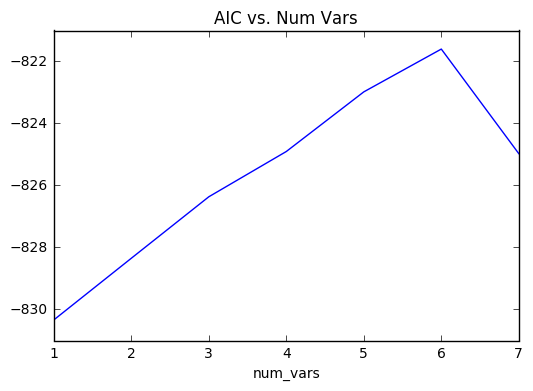

In [6]:
df.set_index('num_vars')['aic'].plot(title = 'AIC vs. Num Vars')


<span class="label label-warning"> Assessment: Apply </span>

As you might imagine, now we're going to <b>implement</b> Stepwise Variable Selection. The process is available built-in when using other coding languages like R, Stata, and SAS which are all more statistics-centric in comparison to Python. 

So what about python? Unfortunately, while scikit learn does have some functionality around feature selection (variable selection), it does not appear that they do stepwise variable selection based on the stackoverflow chatter. Furthermore, as of summer 2018, it doesn't seem like statsmodels does stepwise variable selection either. 

http://scikit-learn.org/stable/modules/feature_selection.html


Furthermore, even if they did do stepwise variable selection for regular regression (OLS), we'd want to make sure it's compatible with WLS. Luckily, stepwise variable selection isn't that complicated and the internet provides some resources:
    
https://planspace.org/20150423-forward_selection_with_statsmodels/

![](variable_selection_3.png "Title")

Now it's your turn. Adapt the code above (or just write your own code from scratch) to perform stepwise variable selection. For simplicity, you can use either forward, backward or bi-directional selection. Use AIC as your performance measure when evaluating different models. 

In [ ]:
# TODO






In [17]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################


# BACKWARD STEPWISE VARIABLE SELECTION WITH ACI


# get the input data
training_data = pd.read_hdf('training_data.hdf')

# start with all variables 
all_possible_vars = ['industrial_production', 'change_inflation', 'credit_risk_premium', 'slope_interest_rate',
         'housing_starts', 'delinquencies', 'change_unemployment']

# define the dataset you want to run the regression on
temp = training_data.iloc[0:200]
print(temp['portfolio_date'].min())
print(temp['portfolio_date'].max())

# get the performance (AIC) with all variables included in the model
results = UserDefinedFunctions.WLS_regression(temp, x_vars = all_possible_vars,  rho = 0.99)
current_aic = results['aic']
print('starting AIC with all vars: ', current_aic)
print()

# define the variables we want to use
# (again, starting with all variables)
vars_to_use = all_possible_vars.copy()

search = True

iterations = 0
while search:

    print('iteration number: ', iterations)
    iterations += 1
    
    best_candidate_aic = 999999999.
    
    # iterate through variables
    for var in all_possible_vars:    

        # if variable is in the list of variables we are using, then test removing it
        if var in vars_to_use:

            vars_to_try = vars_to_use.copy()

            # remove the candidate variable 
            vars_to_try.remove(var)

            # estimate model
            results = UserDefinedFunctions.WLS_regression(temp, 
                                                          x_vars = vars_to_try, 
                                                          rho = 0.99)
            # get the performance of this model
            performance = results['aic']
            print('--removing {} results in {}'.format(var, performance))

            # if removing this variable improves the aic, then consider adding it
            if performance < current_aic:

                if performance < best_candidate_aic:

                    candidate_variable = var
                    best_candidate_aic = performance
    
    # if removing a variable doesn't improve performance, then strop
    if best_candidate_aic > current_aic:
        search = False
        print('break out: {}'.format(best_candidate_aic))
        
    # if removing a variable improves performance, then remove it and keep testing
    else:
        vars_to_use.remove(candidate_variable)
        current_aic = best_candidate_aic
    print('done with iteration. Remove {} and new best aic is {}'.format(candidate_variable, current_aic))
    print()

    
print('final variables to use:', vars_to_use) 


1996-12-31 00:00:00
2013-07-31 00:00:00
starting AIC with all vars:  -581.515804198

iteration number:  0
--removing industrial_production results in -583.4986200048713
--removing change_inflation results in -582.7477195071428
--removing credit_risk_premium results in -582.6935113550799
--removing slope_interest_rate results in -581.5906036545709
--removing housing_starts results in -580.818327495145
--removing delinquencies results in -583.2702910941025
--removing change_unemployment results in -581.4471194812988
done with iteration. Remove industrial_production and new best aic is -583.4986200048713

iteration number:  1
--removing change_inflation results in -584.743116049038
--removing credit_risk_premium results in -584.6182592003686
--removing slope_interest_rate results in -583.5799414249491
--removing housing_starts results in -582.8057640930858
--removing delinquencies results in -585.2519825873921
--removing change_unemployment results in -583.4455910257295
done with iteratio

<span class="label label-warning"> Assessment: Apply </span>

Now <b>implement</b> stepwise variable selection again but change your methodology. So choose a different version of stepwise variable selection (forward, backward, bi-direcitonal) or a different performance measure (R^2, adjusted R^2, RMSE, or anything else)

In [16]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################


# FORWARD STEPWISE VARIABLE SELECTION with ADJUSTED R^2
# (adjusted R^2 is another way of measuring how well a model fits the data while also penalizing
# the number of explanatory variables used in the model - google it!)

# get the input data
training_data = pd.read_hdf('training_data.hdf')

all_possible_vars = ['industrial_production', 'change_inflation', 'credit_risk_premium', 'slope_interest_rate',
         'housing_starts', 'delinquencies', 'change_unemployment']

# recall that high R^2 is good in contrast to low AIC being good
# so set the initial R^2 performance really low
current_performance = -999

# get some training data
temp = training_data.iloc[0:200]
print(temp['portfolio_date'].min())
print(temp['portfolio_date'].max())

# define the variables we want to use
# initialize as empty list 
# (start with no variables since this is using forward variable selection)
vars_to_use = []

search = True

iterations = 0
while search:

    print('iteration number: ', iterations)
    iterations += 1
    
    best_candidate_performance = -999.
    
    # iterate through variables
    for var in all_possible_vars:    

        # if variable is not already in the list of variables we are using, then test adding it
        if not var in vars_to_use:

            vars_to_try = vars_to_use.copy()

            # add the candidate variable to the list of variables already in use
            vars_to_try.append(var)

            # estimate model
            results = UserDefinedFunctions.WLS_regression(temp, 
                                                          x_vars = vars_to_try, 
                                                          rho = 0.99)
            
            # get the performance of this model
            # save as a tuple (performance, list of vars)
            performance = results['r_squared_adjusted']
            print('--adding {} results in {}'.format(var, performance))

            # if adding this variable improves the r^2, then consider adding it
            if performance > current_performance:

                if performance > best_candidate_performance:

                    candidate_variable = var
                    best_candidate_performance = performance
    
    # if adding any variable doesn't increase model performance, then stop
    if best_candidate_performance < current_performance:
        search = False
        print('break out: {}'.format(best_candidate_performance))
        
    # if adding a variable increases model performance, then do it
    else:
        vars_to_use.append(candidate_variable)
        current_performance = best_candidate_performance
    print('done with iteration. Add {} and new best adjusted R^2 is {}'.format(candidate_variable, best_candidate_performance))
    print()

    
print('final variables to use:', vars_to_use) 



1996-12-31 00:00:00
2013-07-31 00:00:00
iteration number:  0
--adding industrial_production results in -0.005394417627417436
--adding change_inflation results in -0.0026016684990153305
--adding credit_risk_premium results in -0.0030009344995247655
--adding slope_interest_rate results in -0.004841771842645892
--adding housing_starts results in 0.01167383684720602
--adding delinquencies results in -0.005479681199806574
--adding change_unemployment results in 0.004210557998732711
done with iteration. Add housing_starts and new best adjusted R^2 is -677.8971790317116

iteration number:  1
--adding industrial_production results in 0.006305079810794645
--adding change_inflation results in 0.008595656299537624
--adding credit_risk_premium results in 0.009331913881074683
--adding slope_interest_rate results in 0.007124363420789259
--adding delinquencies results in 0.0065503714829940884
--adding change_unemployment results in 0.012268787435777195
done with iteration. Add change_unemployment and

<span class="label label-warning"> Assessment: Analyze </span>

So now you have implemented two methods for variable selection. Run both of them on the same set of data and <b>compare/constrast</b> the results. Do they produce the same set of variables? If not, what is the difference in performance between the two models?

[your answer here]





In [29]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################



# let's define the set of variables to test
all_possible_vars = ['industrial_production', 'change_inflation', 'credit_risk_premium', 'slope_interest_rate',
                     'housing_starts', 'delinquencies', 'change_unemployment']

# let's define a training data set
# (arbitrarily just take the data through JUly 2013)
temp = training_data[training_data['portfolio_date'] <= pd.to_datetime('2013-07-31')]

# analyze the data using forward variable selection based on adjusted R^2
results1 = UserDefinedFunctions.WLS_regression_with_var_selection_r2(temp,
                                                         all_possible_vars = all_possible_vars,
                                                          rho = 0.99,
                                                          verbose = False)
print('variables selected using stepwise forward selection with adjusted R^2:')
print(results1['model_vars'])
print('R^2: {}'.format(results1['r_squared']))
print('adjusted R^2: {}'.format(results1['r_squared_adjusted']))
print('AIC: {}'.format(results1['aic']))
print('MSE (mean squared error): {}'.format(results1['mse']))
print('log likelihood: {}'.format(results1['llf']))
print()

# analyze the data using backwards variable selection based AIC
results2 = UserDefinedFunctions.WLS_regression_with_var_selection_aic(temp,
                                                         all_possible_vars = all_possible_vars,
                                                          rho = 0.99,
                                                          verbose = False)
print('variables selected using stepwise backward selection with AIC:')
print(results2['model_vars'])
print('R^2: {}'.format(results2['r_squared']))
print('adjusted R^2: {}'.format(results2['r_squared_adjusted']))
print('AIC: {}'.format(results2['aic']))
print('MSE (mean squared error): {}'.format(results2['mse']))
print('log likelihood: {}'.format(results2['llf']))
print()

# the two variable selection approaches select different explanatory variables. It is difficult to compare performance but the 
# model based on forward variable selection with adjusted R^2 seems to do better. It's unclear just HOW much better it does and 
# whether the difference is statistically or economically significant. 

variables selected using stepwise forward selection with adjusted R^2:
['change_unemployment', 'slope_interest_rate', 'const', 'housing_starts', 'credit_risk_premium']
R^2: 0.03701137693490453
adjusted R^2: 0.015371183158160773
AIC: -586.6862428892186
MSE (mean squared error): 0.0009304005365297672
log likelihood: 298.3431214446093

variables selected using stepwise backward selection with AIC:
['const', 'housing_starts']
R^2: 0.01710420038101268
adjusted R^2: 0.01167383684720602
AIC: -588.9417857479943
MSE (mean squared error): 0.0009304005365297672
log likelihood: 296.4708928739972



<span class="label label-warning"> Assessment: Evaluate </span>

Based on your results above, critique the two different variable selection methods you chose. Then pick one and justify why you want to use it going forward. 



[you answer here]







For the example code we will use forward variable selection with adjusted R^2. The model it selects has higher performance than the model from backward variable selection with AIC and it has higher performance when measured across multiple metrics. Furthermore, from a "marketing" perspective it's easier to sell a model with four variables rather than just one. While from a scientific/analytical perspective we may prefer parsimony, it'll be difficult to convince clients that you have a model that they should pay for if the model is too simple. 

Note however, that my comparison on forward selection with adjusted R^2 vs. backwards selection with AIC is based on an analysis of running the two approaches on only one date. In this experiment we know we would want to estimate the model anew every single month. For simplicity, and as an illustration only, we only did the comparison for a single date. 

<span class="label label-warning"> Assessment: Understand</span>
    
In the exercises above you selected a smaller set of variables to use from the larger set of all possible variables (or maybe you ended up selecting all the variables?). Now we want to start thinking about ways of measuring the relative importance of each variable. Hull et al. reference using the total explained variance. Under this framework, if we want to measure the importance of some variable var1, we would consider adding var1 to all other variable combinations of the other variables and then measure the average performance gain (via R^2) across each time we add var1. 

So for example, what would the performance gain be if we added var1 to a model that was originally based on just var3 and var4? And what would the performance gain be if we added var1 to a model that was originally based on var3, var5, and var6? Now do that for all possible models and take the average performance gain. 

When we're done testing adding var1 we move on to testing the addition of var2, etc. 

Finally, we can rank the importance of each variable by just summing all the average performance gains for each variable and then take the proportion of each variables contribution to that total. 

Did you get that? So if we have 3 total possible variables here are the possible models: 

[var1]

[var2]

[var3]

[var1, var2]

[var1, var3]

[var2, var3]

[var1, var2,  var3]

What is the number of possible models given N total possible variables?

[your answer here]








Solution:

Given N total variables, we could have a model with just 1 variable, or a model with just 2 variables, ... or a model with all N variables. 

How many 1-variable models are there? There are N of them.

How many 2-variable models are there? If N were 7 then there are "7 choose 2" possible unique combinations. Turning to google and just entering "7 choose 2" shows yields 21. 

So ultimately there are (N choose 1) + (N choose 2) + ... (N choose N)

If N is equal to 7, then this would result in 127 total possible models. 

<span class="label label-warning"> Assessment: Apply</span>

Now implement code to measure relative variable importance across a set of selected variables. So if you end up selecting five variables for the model in July 2013, you'll want to assess the relative importance of just those five variables relative to one another. 

Here's some helper tips on generating possible variable combinations:

In [60]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################



all_vars = ['var0', 'var1', 'var2', 'var3', 'var4' ]

# generate all possible combinations of 3 variables from the list above
combinations = itertools.combinations(all_vars, 3)

# print the results
for c in combinations:
    print(c)

('var0', 'var1', 'var2')
('var0', 'var1', 'var3')
('var0', 'var1', 'var4')
('var0', 'var2', 'var3')
('var0', 'var2', 'var4')
('var0', 'var3', 'var4')
('var1', 'var2', 'var3')
('var1', 'var2', 'var4')
('var1', 'var3', 'var4')
('var2', 'var3', 'var4')


In [ ]:
# TODO

In [83]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################



data = training_data.copy()
rho = 0.99

all_possible_vars = ['industrial_production', 'change_inflation', 'credit_risk_premium', 'slope_interest_rate',
         'housing_starts', 'delinquencies', 'change_unemployment']

# initialize a dictionary to hold the performance gains for each variable
performance_gains = {var: [] for var in all_possible_vars}

# try adding 1 variable to the 'prior model'
for i in range(0, len(all_possible_vars) + 1):
    
    # get all combination of i variables from the set of N possible variables
    # this is the "prior model"
    combinations = itertools.combinations(all_possible_vars, i)
    
    # iterate through every "prior model"
    # ie the model you want to compare against when you add in your selected variable
    for c in combinations:
        
        # get the performance (R^2) if you use the specified combination of variables in the "prior model"
        if c == ():
            prior_r_squared = 0.0
        else:
            prior_r_squared = UserDefinedFunctions.WLS_regression(data, 
                   x_vars = list(c),
                   rho = rho)['r_squared']
        
        # try adding a variable to the combination above
        for var in all_possible_vars:
            
            # first, check if the variable is already included in the "prior model"
            if not var in c:
                
                # add the 'new variable' to the 'prior model' 
                vars_to_test = list(c)
                vars_to_test.append(var)
                
                # get the performance of the 'new model'
                new_r_squared = UserDefinedFunctions.WLS_regression(data, 
                   x_vars = vars_to_test,
                   rho = rho)['r_squared']
                
                # calculate the gain between new and old models
                gain = new_r_squared = prior_r_squared
                
                performance_gains[var].append(gain)

# see the average performance gain for each variable
for var in all_possible_vars:
    print('{} average gain: {}'.format(var, np.mean(performance_gains[var])))
                
# calculate the proportion of total performance gain attributable to each variable
df = pd.DataFrame(performance_gains)
df = df.mean().to_frame('average_gain')
df['total_gain'] = df['average_gain'].sum()
df['importance'] = df['average_gain'] / df['total_gain']
df.sort_values(by = 'importance', inplace = True)

# format data 
df = df[['importance']]
df.reset_index(inplace = True)
df = df.pivot_table(values="importance", columns='index')
df['portfolio_date'] = data['portfolio_date'].max()
df.reset_index(inplace = True, drop = True)
df


industrial_production average gain: 0.012101171380604386
change_inflation average gain: 0.012716932091700859
credit_risk_premium average gain: 0.01137665330247495
slope_interest_rate average gain: 0.011845695427337228
housing_starts average gain: 0.012512316127623902
delinquencies average gain: 0.012293318207050031
change_unemployment average gain: 0.00247940418825438


index,change_inflation,change_unemployment,credit_risk_premium,delinquencies,housing_starts,industrial_production,slope_interest_rate,portfolio_date
0,0.168826,0.032916,0.151033,0.163203,0.16611,0.160652,0.15726,2018-06-30


<span class="label label-warning"> Assessment: Analyze </span>
    
Use the code you developed and analyze the relative weights of a set of explanatory variables for some dataset. Which variables were most important and which were least?

[your answer here]









Sample Answer: Based on the example above, the change in inflation was the most important variable, followed by housing starts and industrial production. Most variables generally had the same level of importance (15-16%) except for the change in unemployment which was by far the least important at only 3%. 

<span class="label label-warning"> Assessment: Evaluate </span>

Based on your analysis above, assess whether your results make good intuitive sense? Can you construct a narrative to describe the relative weights you are seeing? Do your results give you more or less confidence in the procedure for measuring variable importance?

[your answer here]






Sample Answer: I am a bit puzzled that change in unemployment is such a weak predictor of forward market returns. The dataset I used runs from the mid 90s through June 2018 and over that period I would have thought it'd do better. We do use WLS though which means we give greater weight to the recent period. During the last few years, markets have been generally going up though there was significant market turmoil in the first half of 2018 even though the job market has been consistently performing well. That may explain the low weight on the unemployment rate. 

Overall I would have expected more variation in the importance of variables but all variables seem equally important (except for the unemployment rate). This gives me less confidence in the methodology for measuring variable importance and I'd be interested in alternative measures. 

<span class="label label-warning"> Assessment: Create </span>

Procedures for variable selection and measuring variable importance are subjective and just because Hull et al. use certain methodologies does not mean that they're the best. Can you think of any other ways you would choose which variables you'd want to use? THis question isn't about searching google but rather it asks you to try to create your own method. Or other ways to measure variable importance?  

Discuss your ideas below.

[your answer here]






Sample Answer: For variable selection I could see using a decision tree to try to identify which variables are most important (which are chosen by the tree) and then passing only those variables into the linear regression procedure. In this way we combine two different model types. Decision trees are generally recognized to be very good for fature selection because they prioritize using the variables tha generate the most explanatory power at each tree node. 

To measure variable importance we can again use decision trees where there exists a procedure to measure variable importance by measuring the information gain at each node. 


### End Lesson

That's it for this notebook. You can proceed to the next workbook

[intentionally left blank]
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>


<span class="label label-success"> Commentary and Supplemental Content </span>
<a id='supplemental_content_1'></a>

### Definition: Parsimony

Merriam-Webster defines "parsimony" as

1. the quality of being careful with money or resources : "thrift the necessity of wartime parsimony"
2. the quality or state of being stingy: "The charity was surprised by the parsimony of some larger corporations."
3.  economy in the use of means to an end; especially : economy of explanation in conformity with Occam's razor the scientific law of parsimony dictates that any example of animal behavior should be interpreted at its simplest, most immediate level 

The third one above and an "economy of explanation" seems to fit our context. So this goes back to what we originally said about wanting a model that is as simple as possible. Simplicity (economy) can take many forms including the type of model (simple linear regression versus a recurrent neural network), estimation frequency (coefficient re-estimation frequently versus only once), and number of variables (a few versus a billion).

Ok, so by Occam's razor we should prefer simplicity which can be interpreted as prefering fewer explanatory variables to more explanatory variables. Occam aside, why should we prefer that? Ingo Ruczinski, some guy with on the internet, says there are lots of reasons to prefer simplicity:

 * We want to explain the data in the simplest way — redundant predictors should be removed. The principle of Occam’s Razor states that among several plausible explanations for a phenomenon, the simplest is best. Applied to regression analysis, this implies that the smallest model that fits the data is best.
 * Unnecessary predictors will add noise to the estimation of other quantities that we are interested in. Degrees of freedom will be wasted.
 * Collinearity is caused by having too many variables trying to do the same job.
 * Cost: if the model is to be used for prediction, we can save time and/or money by not measuring redundant predictors.

http://www.biostat.jhsph.edu/~iruczins/teaching/jf/ch10.pdf

Note: Collinearity is a statistical term for having many variables that are all versions of closely related things (ex: industrial production, new car production, ship building, tractor manufacturing, etc). From a statistical perspective, collinearity can make doing statistics difficult (such as in muddying the measured statsitical significance of your explanatory variables).

To the list above I'd also add that too many variables increases the risk of overfitting. Given enough explanatory variables we could almost perfectly fit any dataset. For instance, just by random chance we might find that a lot of variables have been correlated to historical stock market returns. So if we include enough random variables, we'll likely include one of those variables that "accidentally" predicted the market in the past but there is no rationale to believe it'll predict the market in the future. To be safe (and parsimonious) we should include as few variables in our model as possible to avoid the chance of introducing spurious correlations (but if you like spurious correlations you can find a few here http://www.tylervigen.com/spurious-correlations)

<a href='#snap_back_1'>go back to main body</a>


<span class="label label-success"> Commentary and Supplemental Content </span>
<a id='supplemental_content_2'></a>

### Stepwise Variable Selection

Back in Notebook 1 we spoke a little about Stepwise Variable Selection. Let's expand on that here.

The essence of Stepwise Variable Selection is that we want to only add variables to a model if their contribution in beneficial.  Let's say you have 10 variables you can possibly put into a linear regression model. You start by only including var1 and record how good of a model it is. Then you try var2, then var, etc. After trying them all, you pick the variable that had the best performance and you add that to your model. 

Then you iterate through the remaining nine variables and find which one, in combination with the variable you added in the previous round, produces the best model. Keep going until you hit some stopping criteria that you define (eg the performance only increases by an arbitrarily small amount).

You can do forward variable selection whereby you start with zero variables and add variables one at a time. Or backwards variable selection whereby you start with all variables and subtract variables one at a time. 

In bi-directional stepwise variable selection we combine the forward and backward procedures. Hull et al. aren't clear on how they implement bi-directional variable selection and the internet provides many variations on the concept. Here's one where you start with all variables intitially included in the model:

The process is one of alternation between choosing the least significant variable to drop and then re-considering all dropped variables (except the most recently dropped) for re-introduction into the model. This means that two separate significance levels must be chosen for deletion from the model and for adding to the model. The second significance must be more stringent than the first."

https://www.stat.ubc.ca/~rollin/teach/643w04/lec/node43.html

So in this process, at each iteration we try to drop a variable and then try to add back in a variable (where the performance gain for adding or dropping is satisfied). Why would we ever add back a variable that was previously dropped? Well maybe it's because we don't want to include var1 (say industrial production) when we also are including var6 (unemployment rate) in our model. But as we progress through the stepwise variable selection process, we might find that we end up dropping the unemployment rate from our model which then "makes room" for including industrial production. 

We've been a bit vague in the above discussion by what we mean in terms of model performance. How you choose to measure that is really up to you. Maybe it's statistical significance, or gain in R^2, or drop in RMSE. For Hull et al., they choose to use the Akaike Information Criteria (AIC). 

For more information on stepwise variable selection, see the collective intelligence of the internet at:

https://en.wikipedia.org/wiki/Stepwise_regression


<a href='#snap_back_2'>go back to main body</a>


<span class="label label-success"> Commentary and Supplemental Content </span>
<a id='supplemental_content_3'></a>

### Comparing Models with the Akaike Information Criterion (AIC)

The AIC is a measure used to compare the performance of different models (like R^2 or RMSE) that specifically incorporates information on the number of explanatory variables you use. The goal should be to minimize the calculated AIC value where a better model fit lowers the metric but more explanatory variables increase the metric. For us parsimony-preferring people, the AIC is a good metric to use and helps us pick between competing models (should we use a model that fits very well but includes 50 variables or a model that fits ok and only includes 5 variables).

The AIC metric itself is defined as:


![](variable_selection_2.png "Title")

where L is the likelihood function of the model and K is the number of explanatory variables in your model. 

L is the measure of how well the model fits the data. You want L to be as big as possible. Alternatively, because you want to minimize AIC, you want K to be as small as possible. 

Most statisical packages will calculate AIC as part of any linear regression, including the statsmodels library that we've been using for past coding examples. 

For more information on AIC:

https://www.youtube.com/watch?v=7XAHjm6Vy5k

<a href='#snap_back_3'>go back to main body</a>

<span class="label label-success"> Commentary and Supplemental Content </span>
<a id='supplemental_content_4'></a>

### Which Variables are the Most Important

Let's imagine that you have a model that does a good job of predicting the S&P 500 based on 15 explanatory variables (say the ones selected by Hell et al.). You go to an investor and offer to manage their money using your strategy. You say "Look at all the money I can make you based on the historical performance." The investor is undoubtedly impressed but will inevitably want to know more about what's underneath the hood of your strategy before giving you money and therefore will ask "which variables are most important when you make your prediction?"

This is a bit of a hard question and there are several "reasonable" ways of approaching a solution. 

Hull et al. reference the method by Lindeman, Merenda, and Gold. Here's a description of an implementation of their method written for R: 

"R^2 represents the proportion of variance explained by a set of predictors. If one can estimate the proportion of the R^2 contributed by each individual predictor, the one with larger R^2 would be more important to explain the outcome variable. However, the difficulty lies in how to get the R^2 for each predictor.

The most intuitive way to decompose the total R^2 is to add the predictors to the regression model sequentially. Then, the increased R^2 can be considered as the contribution by the predictor just added. However, this method depends on the sequence the predictors are added if the predictors are correlated. 

The lmg approach is based on sequential R^2 but takes care of the dependence on orderings by averaging over orderings. For example, for a model with 4 predictors, there are a total of 24 orderings. For each ordering, the contributed R^2 can be calculated. lmg is the average of the R^2 across the 24 orderings."

https://advstats.psychstat.org/book/mregression/importance.php

So in other words: to measure a variable's importance we're going to measure the additional R^2 gained whenever we add that variable to the model. And we're going to add the variable to all possible models (all possible combinations of the variables) and then take the average performance gain.  

That sounds reasonable but there are some downsides to this approach. Can you think of any? 

For another take on variable importance using Lindeman, Merenda, and Gold see here:

https://www.r-bloggers.com/the-relative-importance-of-predictors-let-the-games-begin/

<a href='#snap_back_4'>go back to main body</a>